b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

(535711, 135)

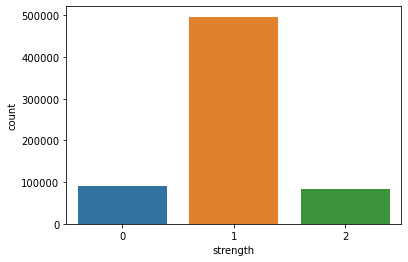

In [2]:
import pandas as pd
import numpy as np
from pandas.core.arrays.sparse import dtype
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv("/home/kali/Downloads/data.csv",error_bad_lines=False)

data.head()

data['strength'].unique()

data.isna().sum()

data[data['password'].isnull()]

data.dropna(inplace=True)
data.isnull().sum()
sns.countplot(data['strength'])

password=np.array(data)
password

import random
random.shuffle(password)
x=[labels[0] for labels in password]
y=[labels[1] for labels in password]

def divide_char(inputs):
    character=[]
    for i in inputs:
        character.append(i)
    return character

divide_char('kzde5577')

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=divide_char)
vectorizer.fit_transform(x)

z=vectorizer.fit_transform(x)
z.shape

vectorizer.get_feature_names()

document_vector=z[0]
document_vector

df=pd.DataFrame(document_vector.T.todense(),index=vectorizer.get_feature_names(),columns=['TF-IDF'])
df.sort_values(by=['TF-IDF'],ascending=False)

from sklearn.model_selection import train_test_split
z_train,z_test,y_train,y_test=train_test_split(z,y,test_size=0.2)
z_train.shape




In [7]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=0,multi_class="multinomial")
clf.fit(z_train,y_train)



LogisticRegression(multi_class='multinomial', random_state=0)

In [8]:
dt=np.array(['%@123abcd'])
pred=vectorizer.transform(dt)
clf.predict(pred)

array([1])

In [9]:
y_pred=clf.predict(z_test)
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [10]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred)) #accuracy is 81%

[[ 5524 12530    10]
 [ 4030 92745  2574]
 [   37  5163 11315]]
0.8182306911176155


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.31      0.40     18064
           1       0.84      0.93      0.88     99349
           2       0.81      0.69      0.74     16515

    accuracy                           0.82    133928
   macro avg       0.74      0.64      0.68    133928
weighted avg       0.80      0.82      0.80    133928

